<a href="https://colab.research.google.com/github/DrVishalChaudhary/_DeepLearningProjects/blob/main/Multi_class_Classification_using_CNN_for_github.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Multi-class Classification Problem - Supervised Learning

* Classification between 10 food classes

* CNN model will learn patterns during training

* Accuracy depends on learning of model

In [ ]:
# Library import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread
import pandas as pd
import os

In [ ]:
data_dir = "/content/drive/MyDrive/Colab Notebooks/food/10_food_classes_all_data"

train_data_path = data_dir + "/train/"
test_data_path = data_dir + "/test/"

In [ ]:
os.listdir(test_data_path)

['ice_cream',
 'hamburger',
 'sushi',
 'ramen',
 'pizza',
 'steak',
 'grilled_salmon',
 'fried_rice',
 'chicken_wings',
 'chicken_curry']

# Identifying Image Size

In [ ]:
!ls "/content/drive/MyDrive/Colab Notebooks/food/10_food_classes_all_data/train/"

chicken_curry  fried_rice      hamburger  pizza  steak
chicken_wings  grilled_salmon  ice_cream  ramen  sushi


In [ ]:
# Average dimension for chicken_curry images
first_dim = []
second_dim = []
for image_no in os.listdir(train_data_path + '/chicken_curry'):
  img = imread(train_data_path + '/chicken_curry/'+ image_no)
  d1,d2,d3 = img.shape
  first_dim.append(d1)
  second_dim.append(d2)

In [ ]:
first_dim_mean = np.mean(first_dim)
second_dim_mean = np.mean(second_dim)
first_dim_mean, second_dim_mean

(477.34, 495.36133333333333)

In [ ]:
# Average dimension for ice_cream images
first_dim = []
second_dim = []
for image_no in os.listdir(train_data_path + '/ice_cream'):
  img = imread(train_data_path + '/ice_cream/'+ image_no)
  d1,d2,d3 = img.shape
  first_dim.append(d1)
  second_dim.append(d2)

In [ ]:
first_dim_mean = np.mean(first_dim)
second_dim_mean = np.mean(second_dim)
first_dim_mean, second_dim_mean

(480.456, 483.2986666666667)

In [ ]:
# Average dimension for sushi images
first_dim = []
second_dim = []
for image_no in os.listdir(train_data_path + '/sushi'):
  img = imread(train_data_path + '/sushi/'+ image_no)
  d1,d2,d3 = img.shape
  first_dim.append(d1)
  second_dim.append(d2)

In [ ]:
first_dim_mean = np.mean(first_dim)
second_dim_mean = np.mean(second_dim)
first_dim_mean, second_dim_mean

(467.2373333333333, 491.752)

In [ ]:
# Average dimension for ramen images
first_dim = []
second_dim = []
for image_no in os.listdir(train_data_path + '/ramen'):
  img = imread(train_data_path + '/ramen/'+ image_no)
  d1,d2,d3 = img.shape
  first_dim.append(d1)
  second_dim.append(d2)

In [ ]:
first_dim_mean = np.mean(first_dim)
second_dim_mean = np.mean(second_dim)
first_dim_mean, second_dim_mean

(472.13733333333334, 491.38933333333335)

In [ ]:
(477.34 + 480.456 + 467.23 + 472.13)/4

474.289

In [ ]:
(495.361 + 483.29 + 491.752 + 491.38)/4

490.44575

In [ ]:
input_shape = (474, 490, 3)
input_shape

(474, 490, 3)

# Augmented and Non-augmented data

* train_data and test_data: Non-augmented data

* train_data_augmented and test_data_augmented: Augmented data

In [ ]:
#Train and Test data 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagen = ImageDataGenerator(rescale = 1/255.)

train_data = train_datagen.flow_from_directory(train_data_path, target_size=(474, 490), batch_size=32, class_mode='categorical')
test_data = test_datagen.flow_from_directory(test_data_path, target_size=(474, 490), batch_size=32, class_mode='categorical')

Found 7510 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
# Train and Test data with augmentation
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen_augmented = ImageDataGenerator(rescale = 1/255., rotation_range=0.2, shear_range=0.2, zoom_range=0.2, 
                                                    width_shift_range=0.2, height_shift_range=0.2, horizontal_flip=True)
test_datagen_augmented = ImageDataGenerator(rescale = 1/255.)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_data_path, target_size=(474, 490), batch_size=32, class_mode='categorical')
test_data_augmented = test_datagen_augmented.flow_from_directory(test_data_path, target_size=(474, 490), batch_size=32, class_mode='categorical')

Found 7510 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# Model1: 16, 32, 32, 64

* Filters: 16, 32, 32, 64

* Dense: 128, 10

* Activation: Relu and Softmax

* Optimizer: Adam with defauls learning rate

* Metric: Accuracy

* No augmentation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

tf.random.set_seed(42)

model1 = Sequential()
model1.add(Conv2D(16, 3, input_shape = input_shape, activation = 'relu'))
model1.add(MaxPool2D())
model1.add(Conv2D(32, 3, activation = 'relu'))
model1.add(MaxPool2D())
model1.add(Conv2D(32, 3, activation = 'relu'))
model1.add(MaxPool2D())
model1.add(Conv2D(64, 3, activation = 'relu'))
model1.add(MaxPool2D())

model1.add(Flatten())
model1.add(Dense(128, activation = 'relu'))
model1.add(Dense(10, 'softmax'))

model1.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = 'accuracy')
model1.fit(train_data, epochs = 50, steps_per_epoch = len(train_data), validation_data = test_data, validation_steps = len(test_data))

Epoch 1/50
235/235 [==============================] - 2126s 9s/step - loss: 2.1140 - accuracy: 0.2322 - val_loss: 1.9594 - val_accuracy: 0.3012
Epoch 2/50
235/235 [==============================] - 102s 433ms/step - loss: 1.8656 - accuracy: 0.3471 - val_loss: 1.9011 - val_accuracy: 0.3384
Epoch 3/50
235/235 [==============================] - 103s 437ms/step - loss: 1.6881 - accuracy: 0.4274 - val_loss: 1.7322 - val_accuracy: 0.4116
Epoch 4/50
235/235 [==============================] - 102s 434ms/step - loss: 1.3797 - accuracy: 0.5290 - val_loss: 1.7604 - val_accuracy: 0.4044
Epoch 5/50
235/235 [==============================] - 102s 434ms/step - loss: 0.9233 - accuracy: 0.6909 - val_loss: 2.0781 - val_accuracy: 0.3828
Epoch 6/50
235/235 [==============================] - 103s 436ms/step - loss: 0.4849 - accuracy: 0.8413 - val_loss: 2.7210 - val_accuracy: 0.3864
Epoch 7/50
235/235 [==============================] - 103s 437ms/step - loss: 0.2007 - accuracy: 0.9378 - val_loss: 3.8196 - v

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 472, 488, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 236, 244, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 234, 242, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 117, 121, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 115, 119, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 57, 59, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 55, 57, 64)        1

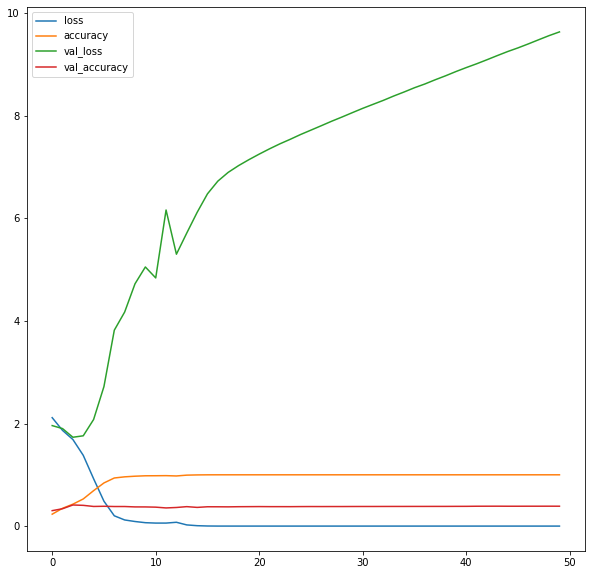

In [ ]:
pd.DataFrame(model1.history.history).plot(figsize = (10,10))

In [ ]:
model1.evaluate(test_data)

79/79 [==============================] - 23s 290ms/step - loss: 9.6356 - accuracy: 0.3876


[9.63555908203125, 0.38760000467300415]

# Model2: 16, 32, 32, 64

* Filters: 16, 32, 32, 64

* Dense: 128, 10

* Activation: Relu and Softmax

* Optimizer: Adam with defauls learning rate

* Metric: Accuracy

* Augmentation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten

tf.random.set_seed(42)

model2 = Sequential()
model2.add(Conv2D(16, 3, input_shape = input_shape, activation = 'relu'))
model2.add(MaxPool2D())
model2.add(Conv2D(32, 3, activation = 'relu'))
model2.add(MaxPool2D())
model2.add(Conv2D(32, 3, activation = 'relu'))
model2.add(MaxPool2D())
model2.add(Conv2D(64, 3, activation = 'relu'))
model2.add(MaxPool2D())

model2.add(Flatten())
model2.add(Dense(128, activation = 'relu'))
model2.add(Dense(10, 'softmax'))

model2.compile(loss = 'categorical_crossentropy', optimizer = tf.keras.optimizers.Adam(), metrics = 'accuracy')
model2.fit(train_data_augmented, epochs = 25, steps_per_epoch = len(train_data_augmented), validation_data = test_data_augmented, validation_steps = len(test_data_augmented))

Epoch 1/25
235/235 [==============================] - 2820s 12s/step - loss: 2.1748 - accuracy: 0.1999 - val_loss: 1.9856 - val_accuracy: 0.2912
Epoch 2/25
235/235 [==============================] - 420s 2s/step - loss: 1.9890 - accuracy: 0.2944 - val_loss: 1.7726 - val_accuracy: 0.3892
Epoch 3/25
235/235 [==============================] - 417s 2s/step - loss: 1.9132 - accuracy: 0.3398 - val_loss: 1.7702 - val_accuracy: 0.3956
Epoch 4/25
235/235 [==============================] - 435s 2s/step - loss: 1.8424 - accuracy: 0.3609 - val_loss: 1.6583 - val_accuracy: 0.4404
Epoch 5/25
235/235 [==============================] - 460s 2s/step - loss: 1.8050 - accuracy: 0.3748 - val_loss: 1.6666 - val_accuracy: 0.4368
Epoch 6/25
235/235 [==============================] - 442s 2s/step - loss: 1.7550 - accuracy: 0.3981 - val_loss: 1.6287 - val_accuracy: 0.4324
Epoch 7/25
235/235 [==============================] - 439s 2s/step - loss: 1.7095 - accuracy: 0.4152 - val_loss: 1.6171 - val_accuracy: 0.45

In [ ]:
model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 472, 488, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 236, 244, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 234, 242, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 117, 121, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 115, 119, 32)      9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 57, 59, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 55, 57, 64)        1

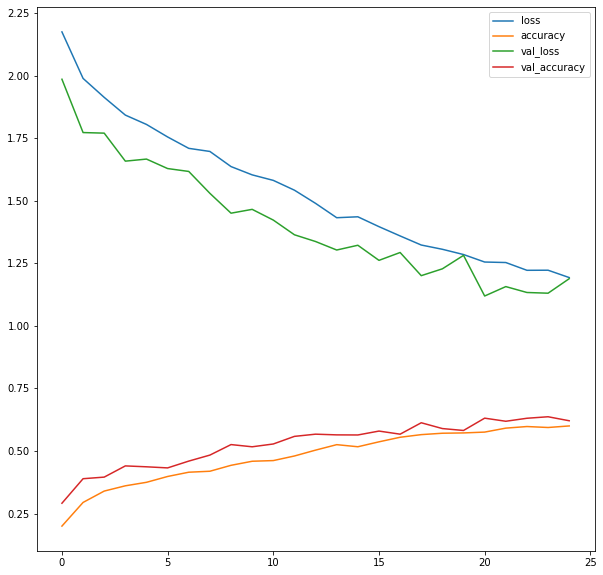

In [ ]:
pd.DataFrame(model2.history.history).plot(figsize = (10,10))

In [ ]:
model2.evaluate(test_data)

79/79 [==============================] - 23s 295ms/step - loss: 1.1886 - accuracy: 0.6208


[1.1885669231414795, 0.6208000183105469]